In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

data = pd.read_csv(r"/Users/mehmetkorkmaz/Applications/venv/iris.csv")

In [2]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data=data.drop('Id',axis=1)
data.index=data.iloc[:,4]             
data=data.iloc[:,0:4]


In [5]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.1,3.5,1.4,0.2
Iris-setosa,4.9,3.0,1.4,0.2
Iris-setosa,4.7,3.2,1.3,0.2
Iris-setosa,4.6,3.1,1.5,0.2
Iris-setosa,5.0,3.6,1.4,0.2
...,...,...,...,...
Iris-virginica,6.7,3.0,5.2,2.3
Iris-virginica,6.3,2.5,5.0,1.9
Iris-virginica,6.5,3.0,5.2,2.0


In [6]:
kmeans = KMeans(n_clusters = 3)        # k-means clustering
kmeans

KMeans(n_clusters=3)

In [7]:
k_fit = kmeans.fit(data)
k_fit.labels_
clusters = k_fit.labels_
pd.DataFrame({"species" : data.index, "clusters": clusters})


,species,clusters
0,Iris-setosa,1
1,Iris-setosa,1
2,Iris-setosa,1
3,Iris-setosa,1
4,Iris-setosa,1
...,...,...
145,Iris-virginica,2
146,Iris-virginica,0
147,Iris-virginica,2
148,Iris-virginica,2


In [8]:
!pip install yellowbrick                              

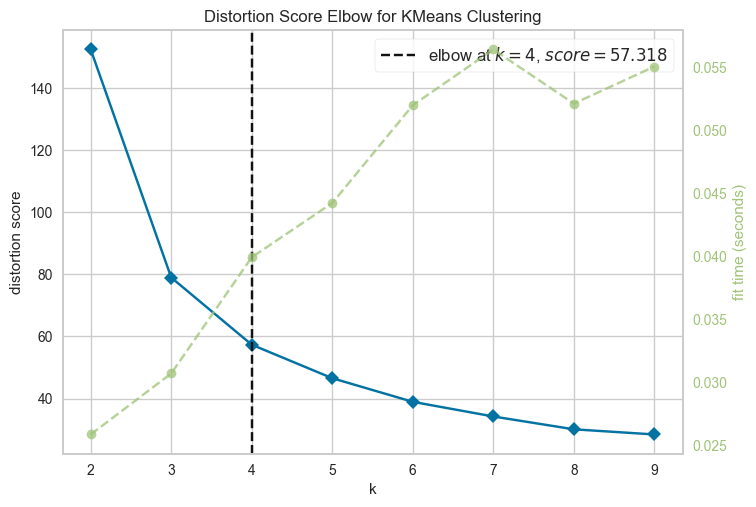

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
from yellowbrick.cluster import KElbowVisualizer                                             
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(data) 
visualizer.poof()                       # Elbow method minimizes within-cluster Sum of Square

In [10]:
from sklearn.metrics import silhouette_score

k_array = np.arange(2,11)
inertia_list = []
silhouette_list = []

for k in k_array:
    km = KMeans(n_clusters = k, n_init = 5, init="k-means++")
    km.fit(data)
    inertia_list.append(km.inertia_)
    sil_score = silhouette_score(data, km.labels_)
    silhouette_list.append(sil_score)

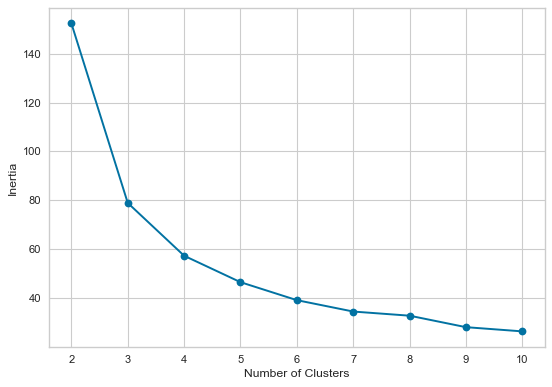

In [11]:
import matplotlib.pyplot as plt

plt.figure(dpi = 80)
plt.plot(k_array, inertia_list, marker ="o")

plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

Graph above!!
The elbow method for K selection visualizes multiple clustering models with different values for K. Model selection is based on whether or not there is an “elbow” in the curve; e.g. if the curve looks like an arm, if there is a clear change in angle from one part of the curve to another.
Distortion, which computes the sum of squared distances from each point to its assigned center

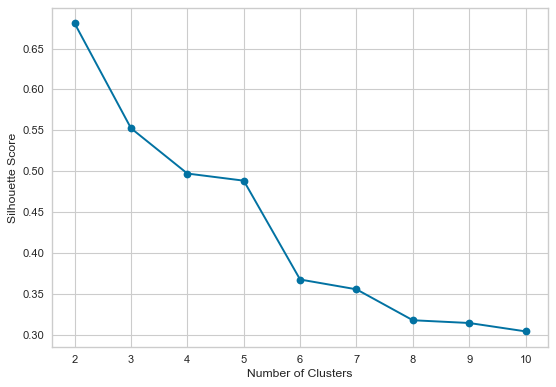

In [12]:
plt.figure(dpi = 80)
plt.plot(k_array, silhouette_list, marker ="o")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

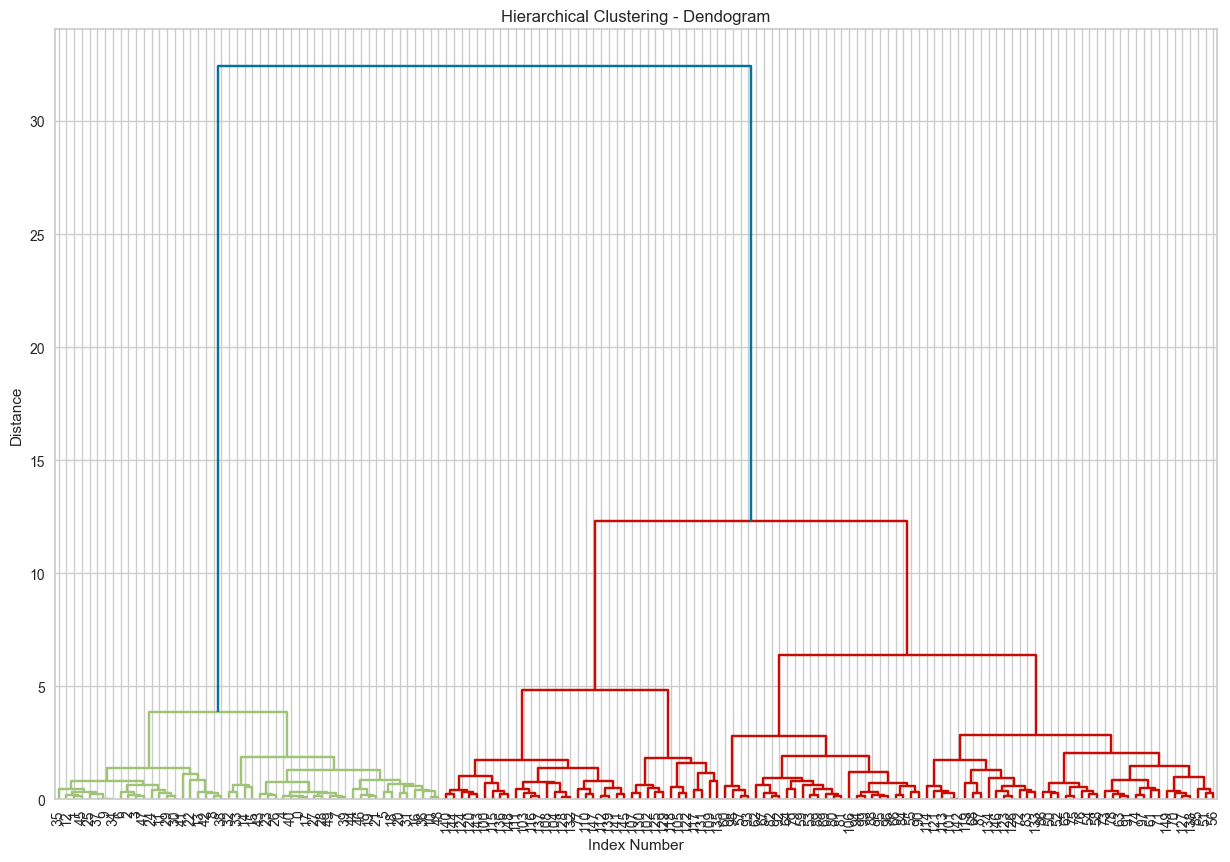

In [13]:
from scipy.cluster.hierarchy import linkage
hc_complete = linkage(data, "complete")
hc_average = linkage(data, "average")
hc_single = linkage(data, "single")
hc_ward=linkage(data,"ward")

from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering - Dendogram')
plt.xlabel('Index Number')
plt.ylabel('Distance')
dendrogram(
            hc_ward,                                                                              
leaf_font_size=10);

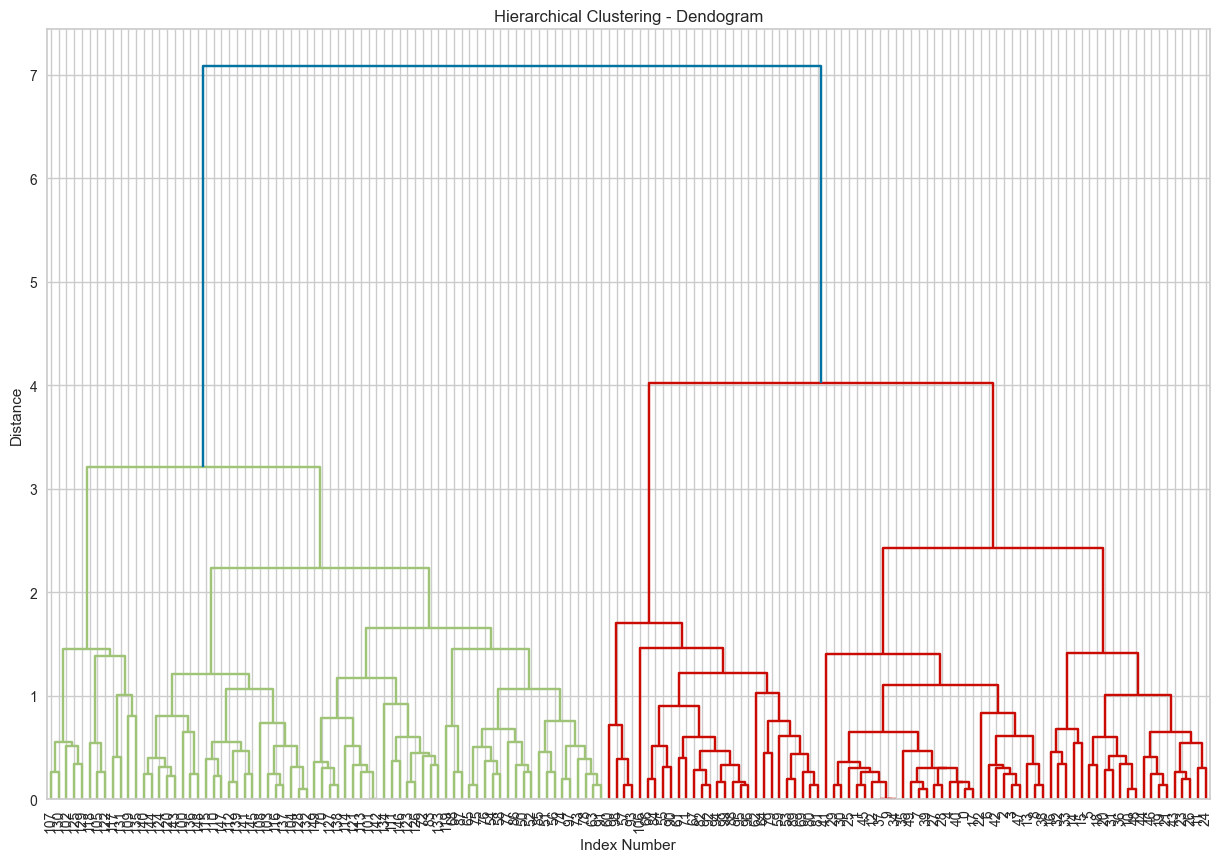

In [14]:
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering - Dendogram')
plt.xlabel('Index Number')
plt.ylabel('Distance')
dendrogram(
            hc_complete,                                                                              
leaf_font_size=10);

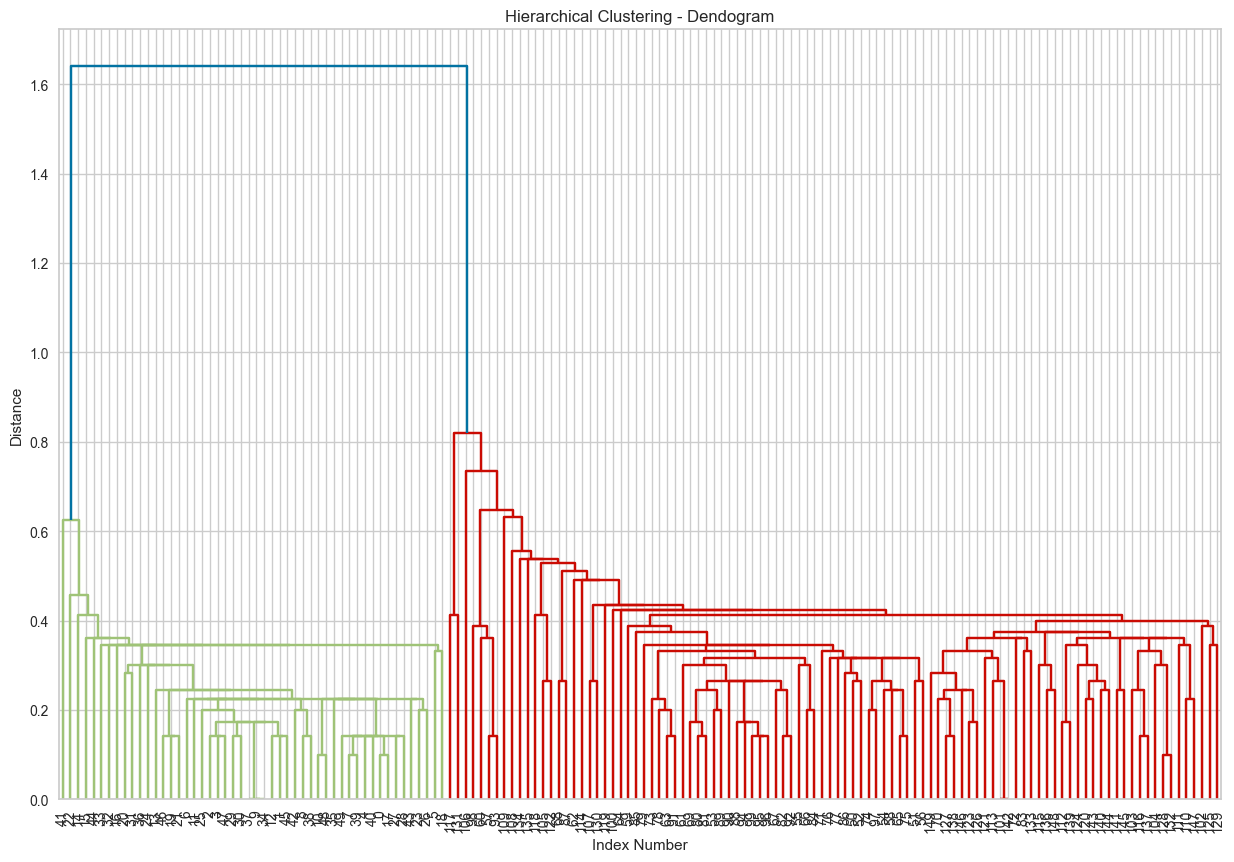

In [15]:
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering - Dendogram')
plt.xlabel('Index Number')
plt.ylabel('Distance')
dendrogram(
            hc_single,                                                                              
leaf_font_size=10);

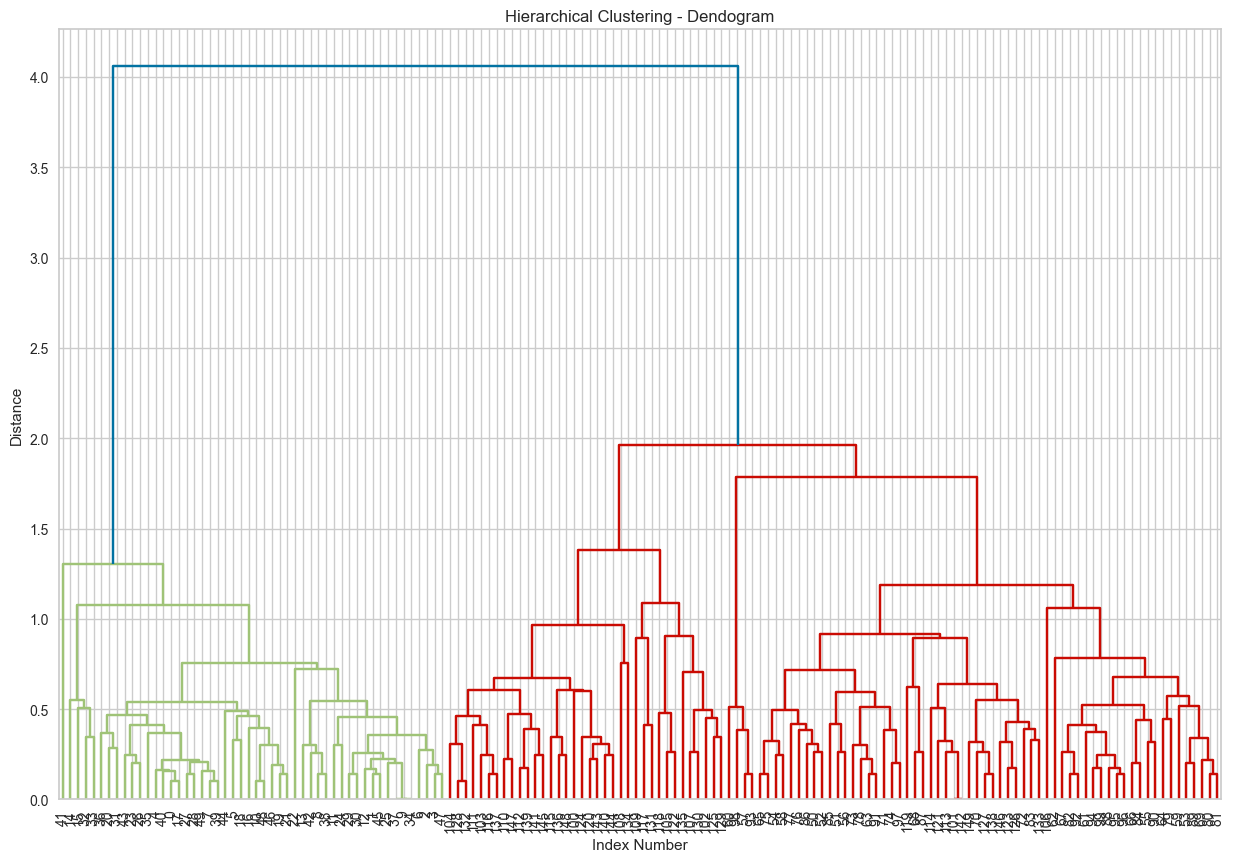

In [16]:
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering - Dendogram')
plt.xlabel('Index Number')
plt.ylabel('Distance')
dendrogram(
            hc_average,                                                                              
leaf_font_size=10);